In [52]:
# Dependencies
import numpy as np

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [53]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [54]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [55]:
# Import the sqlalchemy extract function.
from sqlalchemy import extract

# 1. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_temp = session.query(Measurement.tobs, Measurement.date).filter(extract('month', Measurement.date)==6).all()

print(june_temp)

[(78.0, '2010-06-01'), (76.0, '2010-06-02'), (78.0, '2010-06-03'), (76.0, '2010-06-04'), (77.0, '2010-06-05'), (78.0, '2010-06-06'), (77.0, '2010-06-07'), (78.0, '2010-06-08'), (78.0, '2010-06-09'), (79.0, '2010-06-10'), (78.0, '2010-06-11'), (78.0, '2010-06-12'), (78.0, '2010-06-13'), (77.0, '2010-06-14'), (78.0, '2010-06-15'), (78.0, '2010-06-16'), (77.0, '2010-06-17'), (77.0, '2010-06-18'), (82.0, '2010-06-19'), (78.0, '2010-06-20'), (78.0, '2010-06-21'), (78.0, '2010-06-22'), (78.0, '2010-06-23'), (78.0, '2010-06-24'), (77.0, '2010-06-25'), (76.0, '2010-06-26'), (78.0, '2010-06-27'), (78.0, '2010-06-28'), (78.0, '2010-06-29'), (78.0, '2010-06-30'), (77.0, '2011-06-01'), (78.0, '2011-06-02'), (73.0, '2011-06-03'), (70.0, '2011-06-04'), (76.0, '2011-06-05'), (77.0, '2011-06-06'), (77.0, '2011-06-07'), (77.0, '2011-06-08'), (77.0, '2011-06-09'), (78.0, '2011-06-10'), (77.0, '2011-06-11'), (77.0, '2011-06-12'), (78.0, '2011-06-13'), (78.0, '2011-06-14'), (77.0, '2011-06-15'), (78.0, '2

In [56]:
# 2. Convert the June temperatures to a list.
results_june = []
results_june = june_temp

In [57]:
# 3. Create a DataFrame from the list of temperatures for the month of June. 
import pandas as pd

june_df = pd.DataFrame(results_june, columns=['June Temp', 'Date'])
june_df

,June Temp,Date
0,78.0,2010-06-01
1,76.0,2010-06-02
2,78.0,2010-06-03
3,76.0,2010-06-04
4,77.0,2010-06-05
...,...,...
1695,79.0,2017-06-26
1696,74.0,2017-06-27
1697,74.0,2017-06-28
1698,76.0,2017-06-29


In [58]:
# 4. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,June Temp
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [59]:
# 5. Return to your challenge instructions to compare your summary statistics

## D2: Determine the Summary Statistics for December

In [60]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_temp = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==12).all()

print(dec_temp)

[('2010-12-01', 76.0), ('2010-12-03', 74.0), ('2010-12-04', 74.0), ('2010-12-06', 64.0), ('2010-12-07', 64.0), ('2010-12-08', 67.0), ('2010-12-09', 77.0), ('2010-12-10', 66.0), ('2010-12-11', 69.0), ('2010-12-12', 68.0), ('2010-12-13', 68.0), ('2010-12-14', 71.0), ('2010-12-15', 74.0), ('2010-12-16', 67.0), ('2010-12-17', 66.0), ('2010-12-18', 69.0), ('2010-12-19', 71.0), ('2010-12-23', 70.0), ('2010-12-24', 70.0), ('2010-12-26', 74.0), ('2010-12-27', 74.0), ('2010-12-28', 71.0), ('2010-12-29', 75.0), ('2010-12-30', 75.0), ('2010-12-31', 72.0), ('2011-12-01', 69.0), ('2011-12-02', 68.0), ('2011-12-03', 73.0), ('2011-12-04', 74.0), ('2011-12-05', 73.0), ('2011-12-06', 73.0), ('2011-12-07', 73.0), ('2011-12-08', 73.0), ('2011-12-09', 71.0), ('2011-12-10', 73.0), ('2011-12-11', 73.0), ('2011-12-12', 77.0), ('2011-12-13', 72.0), ('2011-12-14', 71.0), ('2011-12-15', 73.0), ('2011-12-16', 70.0), ('2011-12-17', 73.0), ('2011-12-18', 69.0), ('2011-12-19', 74.0), ('2011-12-20', 72.0), ('2011-12

In [61]:
# 7. Convert the December temperatures to a list.
results_december = []
results_december = dec_temp

In [62]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temp = pd.DataFrame(results_december, columns=['Date','December Temp'])
dec_temp

,Date,December Temp
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0
...,...,...
1512,2016-12-27,71.0
1513,2016-12-28,71.0
1514,2016-12-29,69.0
1515,2016-12-30,65.0


In [63]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temp.describe()

,December Temp
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [64]:
# 10. Return to your challenge instructions to compare your summary statistics

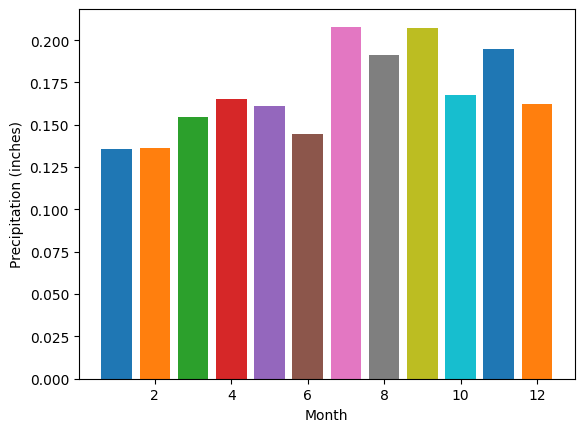

In [74]:
import datetime as dt
import matplotlib.pyplot as plt

# Calculate the date 5 years ago and pull datapoints for 5 years
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=(365*5))

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])

#format errors
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract the month from the date column and create a new column called month
df['month'] = df['date'].dt.month

# Group the data by month and compute the mean precipitation for each month
monthly_mean = df.groupby('month')['precipitation'].mean()

# Create an empty list to store the plot objects
plots = []

# Iterate over the months
for month in monthly_mean.index:
    # Filter the data for the current month
    df_month = df.loc[df['month'] == month]
    
    # Compute the mean precipitation for the current month
    mean_precipitation = df_month['precipitation'].mean()
    
    # Create a bar plot for the current month
    plot = plt.bar(month, mean_precipitation)
    
    # Add the plot object to the list
    plots.append(plot)

    # Add a label to the x-axis
    plt.xlabel('Month')

    # Add a label to the y-axis
    plt.ylabel('Precipitation (inches)')

# Show the plot
plt.show()